In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

%config InlineBackend.figure_formats = ['svg']

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cmap= mpl.colors.ListedColormap(['red', 'black', 'blue'])

In order to plot the decision boundary and margins of SVM's, we will use the `DecisionBoundaryDisplay.from_estimator` from `sklearn` and wrap it into a function for reuse:

In [3]:
def plot_svc_decision_function(model, X, y, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)

    DecisionBoundaryDisplay.from_estimator(
        estimator=model, X=X,ax=ax,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["grey", "black", "grey"],
        linestyles=["--", "-", "--"],
    )

    # indicate the support vectors
    ax.scatter(X[model.support_][:, 0], X[model.support_][:, 1],
               facecolors='none', edgecolors='black', s=100)

    ax.set_xlabel(r'$x_1$', fontsize=16)
    ax.set_ylabel(r'$x_2$', fontsize=16)

# TASK 1. SVM (2 Points): Soft Margin Classifier


Let's work on the same artificial data with two classes from part 1.

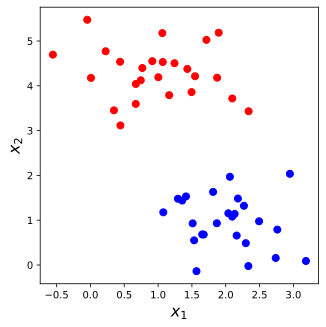

In [4]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)
plt.show()

In [5]:
model = svm.SVC(kernel='linear', C=1.0) # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

SVC(kernel='linear')

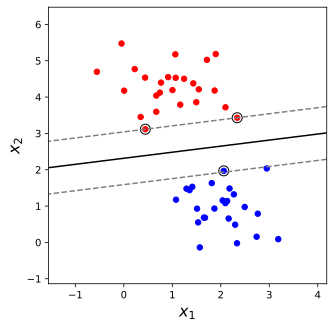

In [6]:
_, ax = plt.subplots(figsize=(5, 5))

plot_svc_decision_function(model, X, y, ax)

plt.show()

In the plot you see a solid and 2 dashed lines.

The solid line shows the decision boundary, meaning points on one side will be assigned to the blue class and on the other side to the red class. In this case all
data points lie on the correct side of the decision boundary, meaning our classifier has successfully learned to separate the classes.

The dashed lines visualize the margin of the SVM classifier. You can see that a
few points lie inside the margin. This is because, in practice, we use a soft-margin implementation for SVM. This means that we allow data points to be inside the margin, or even on the wrong side of the boundary, but during training we "punish" these points.

In the next excercise we will investigate the effect of the `C` parameter of. This
parameter controls how much we "punish" points inside (or on the wrong side) of the margin.

### Regularization
For each value `C` given in the code fragment below create an instance of SVC and set its parameter C accordingly. Train the model on the data `X` from the cells above. Plot the decision boundary using `plot_svc_decision_function(model, X, y, ax)`. Observe the effect from the plots and discuss with your colleagues whether it is in line with your expectation.



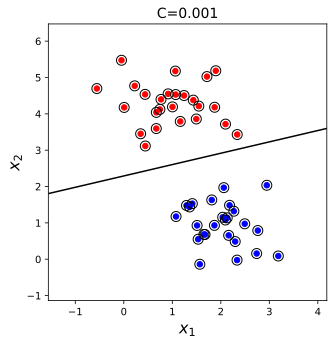

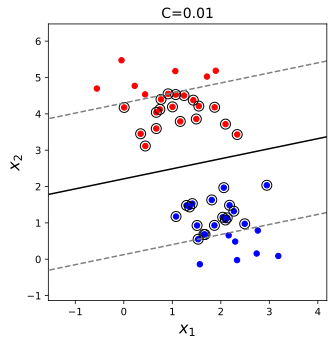

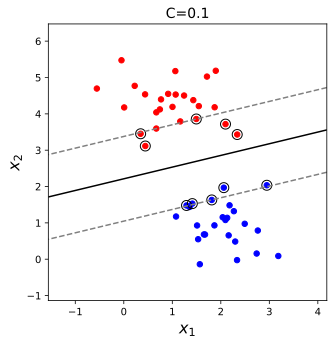

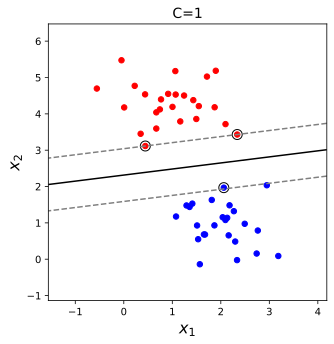

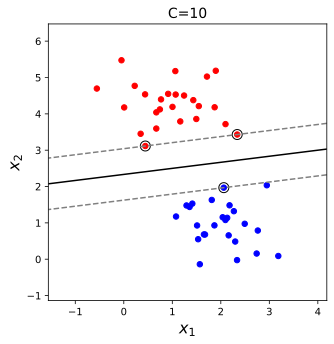

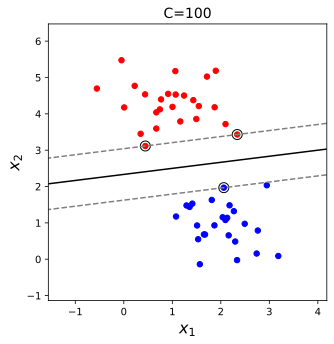

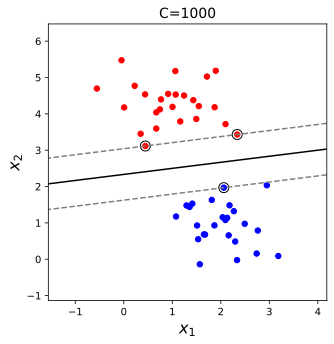

In [7]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of SVC and set its parameter C
    # call its .fit method to train it on X and y

    model = svm.SVC(kernel='linear', C=c)
    model.fit(X, y)

    _, ax = plt.subplots(figsize=(5, 5))
    plot_svc_decision_function(model, X, y, ax)
    ax.set_title(f"C={c}")
    plt.show()

### We add a new datapoint

We will now add a new red data point, that lies very close to the cluster of blue points.

In real world datasets, we run into this situation all the time. One reason can be that some data points really do look very similar but belong to different classes (e.g. imagine distinguishing a crocodile from an alligator). Another reason could be that the data point would really belong to the other (yellow) class but has been annotated badly.

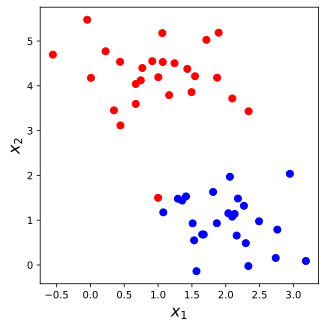

In [8]:
X2 = np.append(X, [[1., 1.5]], axis=0)
y2 = np.append(y, [0], axis=0)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap=cmap)
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)
plt.show()

Rerun the examle from above, i.e. train a linear `SVC` with different values of `C` and see what changes.

Pay particular attention to how the new data point changes the outcome.

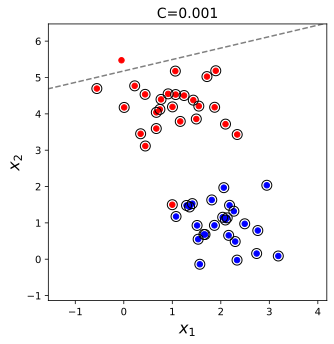

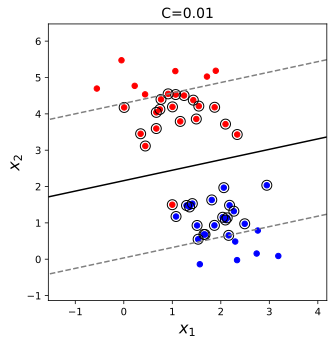

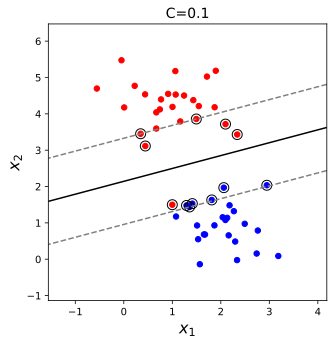

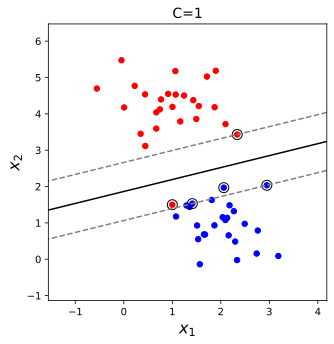

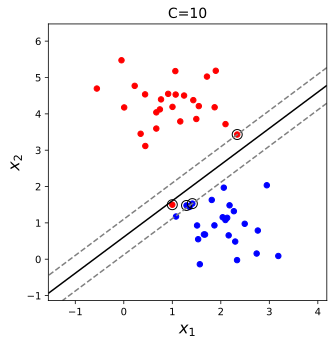

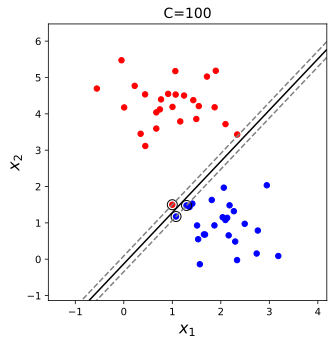

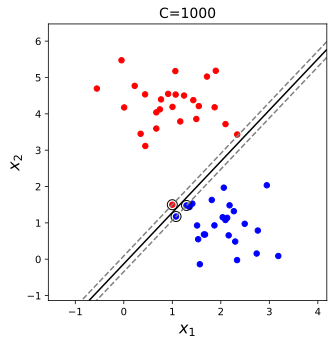

In [9]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of SVC and set its parameter C
    # call its .fit method to train it on X and y

    model = svm.SVC(kernel='linear', C=c)
    model.fit(X2, y2)

    _, ax = plt.subplots(figsize=(5, 5))
    plot_svc_decision_function(model, X2, y2, ax)
    ax.set_title(f"C={c}")
    plt.show()



Based on the experiments in **task 1** above, which value for `C` would you choose for the new data, and **why**?  


C=1 seems optimal, as it separates the classes well with comparably large margins and only a few margin violations. The "outlier" is the only misclassified training example.

# TASK 2. Support Vector Machines - Unbalanced Data (2 points)

How to handle unbalanced classes with SVM? Below you see an example of an unbalanced problem. There are 1000 red samples and just 100 blue samples. The SVM is very sensitive to this. Here we will explore the SVMs behaviour in the unbalanced case.

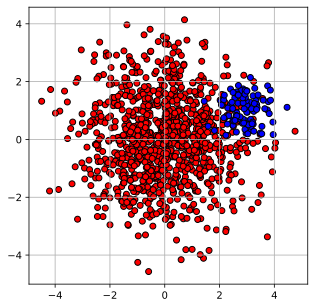

In [10]:
# we create clusters with 1000 and 100 points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X_unbal = np.r_[1.5 * rng.randn(n_samples_1, 2), 0.5 * rng.randn(n_samples_2, 2) + [3, 1]]
y_unbal = [0] * (n_samples_1) + [1] * (n_samples_2)

_, ax  =plt.subplots(figsize=(5.0, 5.0))
ax.grid()

ax.scatter(X_unbal[:, 0], X_unbal[:, 1], c=y_unbal, cmap=cmap,
            edgecolors='k')

plt.show()
# wenn nicht balanciert, d.h. Grösse der Klassen sehr verschieden
# dann ist soft margin nicht gut und wir müssen Kernel nehmen

### Default solution

In the cells below, you see a simple way to classify the above data.
* We use `LinearSVC` with default parameters as our model and fit it on the unbalanced data
* We visualize the resulting decision boundary
* We compute performance metrics

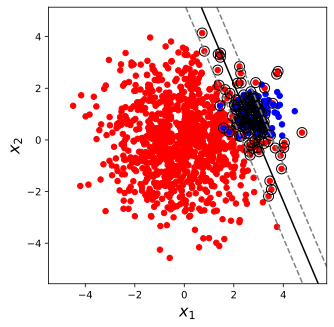

In [11]:
# This should look familiar by now.

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_unbal, y_unbal)

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(clf, X_unbal, y_unbal, ax)
plt.show()

In [12]:
from sklearn.metrics import classification_report

# get predictions from the classifier
# it will assign red to all points to the left of the solid line and yellow to the points on the right side
y_pred = clf.predict(X_unbal)

# the function classification_report computes precision, recall, and F1 score
# and returns a nicely formatted string
# it takes the true labels as argument y_true and predicted labels as y_pred
# the digits argument controls how many decimal points are printed
# the support column in the output shows how many data points belong to each class
print(classification_report(y_true=y_unbal, y_pred=y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.979     0.972     0.975      1000
           1      0.738     0.790     0.763       100

    accuracy                          0.955      1100
   macro avg      0.859     0.881     0.869      1100
weighted avg      0.957     0.955     0.956      1100



### Handle unbalanced data using class weights

In this exercise we will explore how the `class_weight` parameter can be used to handle unbalanced data.

We have seen previously that `C` "punishes" data points that lie on the wrong side of the classification boundary. The `class_weight` parameter follows a similar idea. It allows us to control how harshly we punish points on the wrong
side for each class separately. For example, we could choose to force more yellow points to be on the right of the boundary, by giving them more *weight*. This means they will be counted more during training and mis-classifications are punished more.

The default value for the `class_weight` parameter is `None` and means both
classes will have a weight of 1.

You can manually set weights using a dictionary:
```
my_class_weights = {
  0: 1.0,
  1: 1.0,
}
```
The keys correspond to the class labels (in our case 0 for red and 1 for yellow)
and the values correspond to the weight we want to set. We can then set `class_weight=my_class_weights`.


Finally, you can specify `class_weight='balanced'`. In that case, `sklearn` tries to automatically determine good class weights. Let $n$ be the total number of samples (1100 in our case), $c$ the total number of classes (2 in our case), and $n_i$ the number of samples in class $i$ (in our case $n_0 = 1000$ and $n_1 = 100$, then it computes the class weights $w_i$ as $w_i = \frac{n}{c n_i}$.

Choose a proper parameter for `class_weight` for example by manually trying out different values.

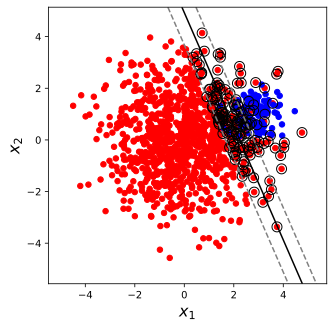

In [13]:
wclf = svm.SVC(kernel='linear', class_weight='balanced') # anstatt balancierte Daten, Klassengewichte einführen
wclf.fit(X_unbal, y_unbal)

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(wclf, X_unbal, y_unbal, ax)
plt.show()

In [13]:
print(classification_report(y_true=y_unbal, y_pred=wclf.predict(X_unbal), digits=3))

              precision    recall  f1-score   support

           0      0.997     0.929     0.962      1000
           1      0.577     0.970     0.724       100

    accuracy                          0.933      1100
   macro avg      0.787     0.950     0.843      1100
weighted avg      0.959     0.933     0.940      1100



In [ ]:
# obige Varianten machen für obige Daten keinen Sinn, dort sollte man wirklich kernel trick verwenden


# Task 3. SVM Kernel Trick (6 points)
In this task we will investigate the case of non-linearly separable data. In order to handle such a case, the **Kernel Trick** can be used. We transform our data and map it into a **higher dimensional feature space** (e.g., if the data had two features (2D-space), it becomes 3D-space). The goal is that after the transformation to the higher dimensional space, the classes will be linearly separable. The decision boundary can then be fitted to separate the classes and make predictions. The decision boundary will be a hyperplane in this higher dimensional space.


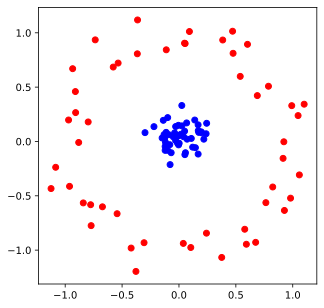

In [14]:
X_non_linear, y_non_linear = datasets.make_circles(100, factor=.1, noise=.1)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap=cmap)
plt.show()

### Default model

Below you can see what happens if we naively train a linear `SVC` model on this non-linear dataset.

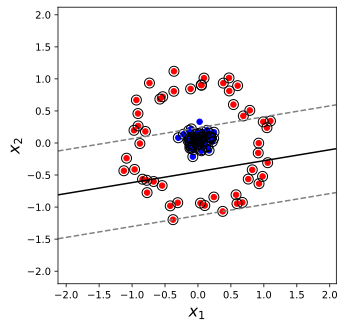

In [15]:
clf = svm.SVC(kernel='linear').fit(X_non_linear, y_non_linear)

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(clf, X_non_linear, y_non_linear, ax)
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

              precision    recall  f1-score   support

           0      1.000     0.380     0.551        50
           1      0.617     1.000     0.763        50

    accuracy                          0.690       100
   macro avg      0.809     0.690     0.657       100
weighted avg      0.809     0.690     0.657       100



### Manually Adding a Helper Dimension

It is clear that no linear discrimination will ever be able to separate this data. We can think about how we might project the data into a higher dimension such that a linear separator would be sufficient. In the code below we compute a new value `r` based on the data points. Adding `r` as a new dimension to our data, we will see that the data becomes linearly separable.

We compute $r = e^{-||x||^2}$. We chose this because the data points lie on circles and $||x||^{2}$ corresponds to the radius of the circle that a data point lies on. The exponential is often used for numerical stability. However in this case, the picture would look the same when plotting $-||x||^{2}$ directly.

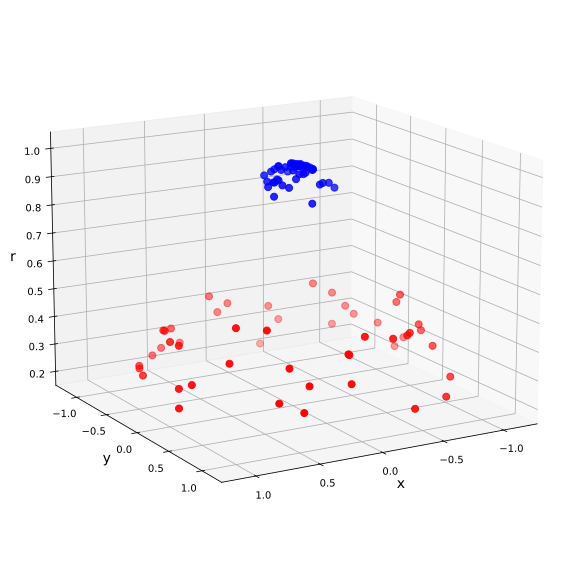

In [17]:
r = np.exp(-(X_non_linear ** 2).sum(1))

fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r,
             c=y_non_linear, s=50, cmap=cmap)
ax.view_init(elev=15, azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

plt.show()

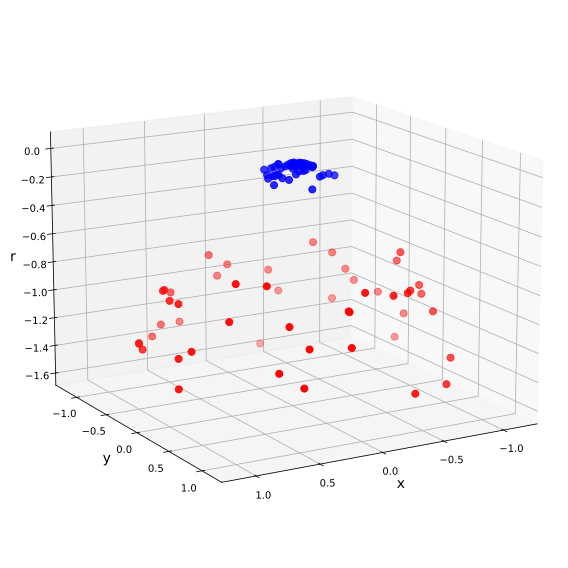

In [18]:
r2 = (-X_non_linear ** 2).sum(1)
fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r2,
             c=y_non_linear, s=50, cmap=cmap)
ax.view_init(elev=15, azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

plt.show()

We see the separation along the additional feature even clearer, if we just consider the projection on the $r$-axis:

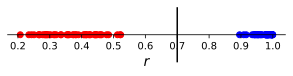

In [19]:
_, ax = plt.subplots(figsize=(5, 1))
ax.scatter(r,[0.0]*len(r),c=y_non_linear, cmap=cmap)
ax.axvline(0.7, color='black')
ax.set_ylim([-0.04,0.04])
ax.get_yaxis().set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.set_xlabel('$r$')
plt.show()

### 3A Linear Classification in the extended feature space

Task: Append the additional feature `r` to the original data `X_non_linear` and train a linear `SVC` in the extended feature space.

In [20]:
X_3d = np.insert(X_non_linear, 2, r, axis=1)

In [21]:
clf_3d = svm.SVC(kernel='linear').fit(X_3d, y_non_linear)

Have the accuracy metrics improved?

In [22]:
print(classification_report(y_true=y_non_linear, y_pred=clf_3d.predict(X_3d), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100



We can now visualise the learned decision boundary in the extended feature space together with the transformed data:

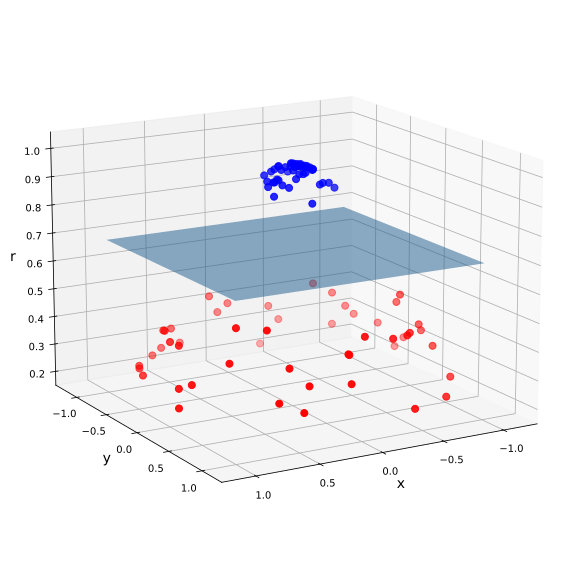

In [23]:
# get the parameters from the optimised model that specify the decision boundary
w = clf_3d.coef_[0]

b=clf_3d.intercept_[0]

fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r,
             c=y_non_linear, s=50, cmap=cmap)
ax.view_init(elev=15, azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

# Surface plot of the decision boundary (a plane) from the
# optimised parameters
xx, yy = np.meshgrid(np.linspace(-1,1,2),np.linspace(-1,1,2))
# 0=b+w_0*x+w_1*y+w_2*z  ->  rearrange for z
z = -(b + w[0]*xx * w[1]*yy) / w[2]
ax.plot_surface(xx, yy, z, alpha=0.5)

plt.show()

What is the accuracy from the classification report achieved with the linear SVM in the extended feature space?

### 3B The Kernel Trick
**Note** that in this case it was relatively straight forward to find a suitable new dimension `r` which allows to separate the data linearly. However, this is not feasible for real world datasets. We will now use the RBF kernel on the unchanged data to let the SVM find a proper projection by itself.
To use the kernel trick, we need to set a non-linear `kernel`.

Use `kernel='rbf'` and fit an `SVC` model on `X_non_linear` and `y_non_linear`.

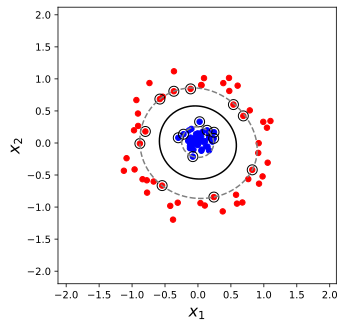

In [24]:
clf = svm.SVC(kernel='rbf', gamma=1, C=1.0)
clf.fit(X_non_linear, y_non_linear)

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(clf, X_non_linear, y_non_linear, ax)
plt.show()

In [25]:
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100




Report for **task 3B** the accuracy achieved with the SVM with rbf-kernel.

In [ ]:
# DL hat das black box problem, es gibt deshalb explonatory research
# dort werden SVM noch oft verwendet, um Modelle zu haben die einfacher zu verstehen sind
# sicher nicht für bilder, je nach dem für tabellarische Daten, und man muss es schnell und einfach machen
# er braucht heute keine SVM, vor allem wegen deep learning